In [1]:
# Initial imports for data handling and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import numpy as np  # For numerical operations

# Additional imports for plotting and date handling
import matplotlib.pyplot as plt  # For creating static plots
import matplotlib.dates as mdates  # For handling date formats in plots
from sklearn.preprocessing import MinMaxScaler


# Load Covid Data From CSV File
The dataset is provided by the World Health Organisation: https://ourworldindata.org/covid-cases

In [2]:
covid_data_df = pd.read_csv('Data/owid-covid-data.csv')
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
covid_data_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
362254,ZWE,Africa,Zimbabwe,2023-12-02,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362255,ZWE,Africa,Zimbabwe,2023-12-03,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362256,ZWE,Africa,Zimbabwe,2023-12-04,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362257,ZWE,Africa,Zimbabwe,2023-12-05,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362258,ZWE,Africa,Zimbabwe,2023-12-06,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
#Returns the shape of the dataframe
covid_data_df.shape

(362259, 67)

# Convert to date time object

In [5]:
#covid_data['iso_code'] = covid_data['iso_code'].astype("string")
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])

In [6]:
#Returns the data types of each column
covid_data_df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [7]:
#Peak to the data after conversion
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
covid_data_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
362254,ZWE,Africa,Zimbabwe,2023-12-02,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362255,ZWE,Africa,Zimbabwe,2023-12-03,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362256,ZWE,Africa,Zimbabwe,2023-12-04,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362257,ZWE,Africa,Zimbabwe,2023-12-05,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362258,ZWE,Africa,Zimbabwe,2023-12-06,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


# Data visualization and pre-processing

In [9]:
#Value counts for continent and location
covid_data_df['continent'].value_counts()
covid_data_df['location'].value_counts()

Malaysia           1441
Aruba              1441
North America      1441
India              1441
Sweden             1441
                   ... 
Scotland           1305
Wales              1198
Macao               795
Northern Cyprus     691
Western Sahara        1
Name: location, Length: 255, dtype: int64

## Total COVID-19 Cases per Continen in Milions

/var/folders/cv/m10s4_4d4830fg5nsm4cqdl80000gn/T/ipykernel_50446/4277739065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='total_cases', data=total_cases_per_continent, palette=palette)


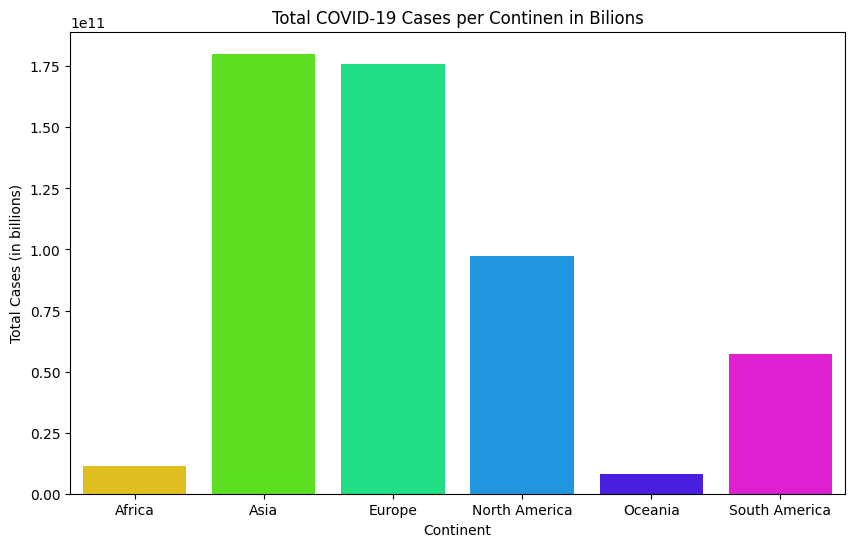

In [10]:
# Summing up the total cases for each continent
total_cases_per_continent = covid_data_df.groupby('continent')['total_cases'].sum().reset_index()

# Setting up the color palette for different continents
palette = sns.color_palette("hsv", len(total_cases_per_continent['continent'].unique()))

# Creating a bar plot with a different color for each continent
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='continent', y='total_cases', data=total_cases_per_continent, palette=palette)

# Adding labels and title for clarity
plt.xlabel('Continent')
plt.ylabel('Total Cases (in billions)')
plt.title('Total COVID-19 Cases per Continen in Bilions')

# Displaying the plot
plt.show()

## Total COVID-19 Cases per Continent Over Time in millions

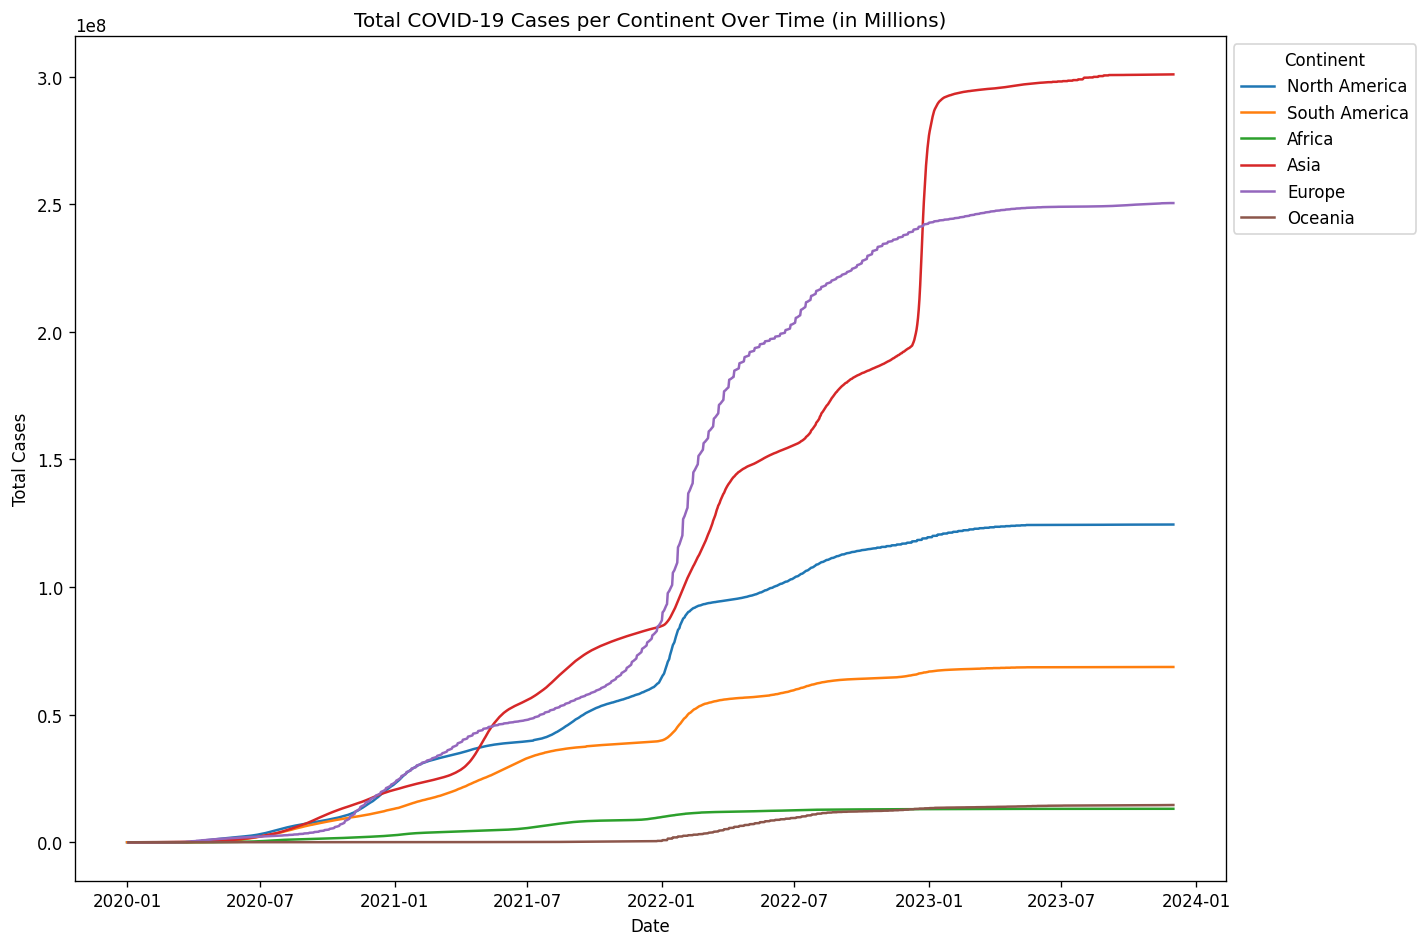

In [11]:
#cutting of the data that causing the drop in the graph, probably due to incomplete dataset
cutoff_date = pd.to_datetime('2023-12-01') 
# r data to exclude dates that may have incomplete data
covid_data_df_filtered = covid_data_df[covid_data_df['date'] <= cutoff_date]

# Sum total cases for each continent on each date
total_cases_per_continent_date = covid_data_df_filtered.groupby(['date', 'continent'])['total_cases'].sum().reset_index()

# Create a high-resolution line plot
plt.figure(figsize=(12, 8), dpi=120)  # Higher DPI for better resolution
sns.lineplot(x='date', y='total_cases', hue='continent', data=total_cases_per_continent_date, palette='tab10')

# Improve date format on x-axis for readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust interval as needed

# Adding labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases per Continent Over Time (in Millions)')

# Improve legend
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()

## Total COVID-19 Deaths per Continen in Milions

/var/folders/cv/m10s4_4d4830fg5nsm4cqdl80000gn/T/ipykernel_50446/3670210885.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='total_deaths', data=total_cases_per_continent, palette=palette)


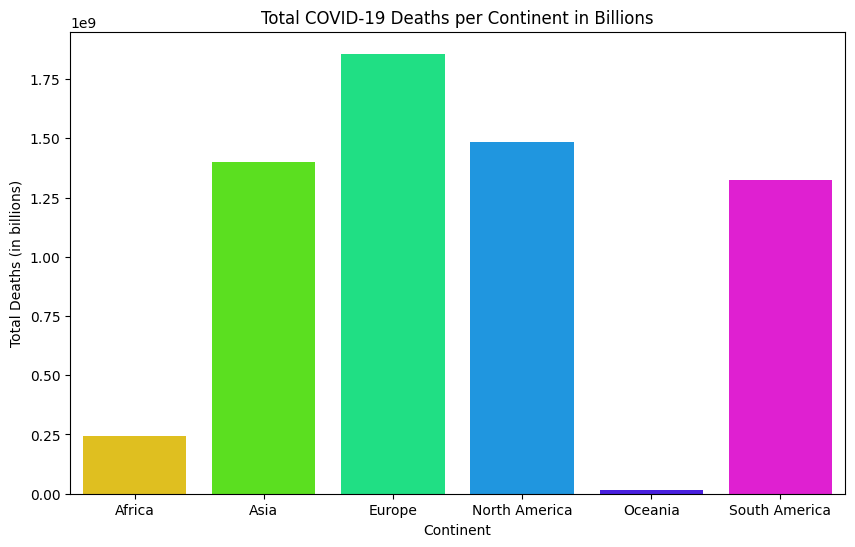

In [12]:
# Summing up the total cases for each continent
total_cases_per_continent = covid_data_df.groupby('continent')['total_deaths'].sum().reset_index()

# Setting up the color palette for different continents
palette = sns.color_palette("hsv", len(total_cases_per_continent['continent'].unique()))

# Creating a bar plot with a different color for each continent
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='continent', y='total_deaths', data=total_cases_per_continent, palette=palette)

# Adding labels and title for clarity
plt.xlabel('Continent')
plt.ylabel('Total Deaths (in billions)')
plt.title('Total COVID-19 Deaths per Continent in Billions')

# Displaying the plot
plt.show()


## Total COVID-19 Deaths per Continen in Milions Over Time

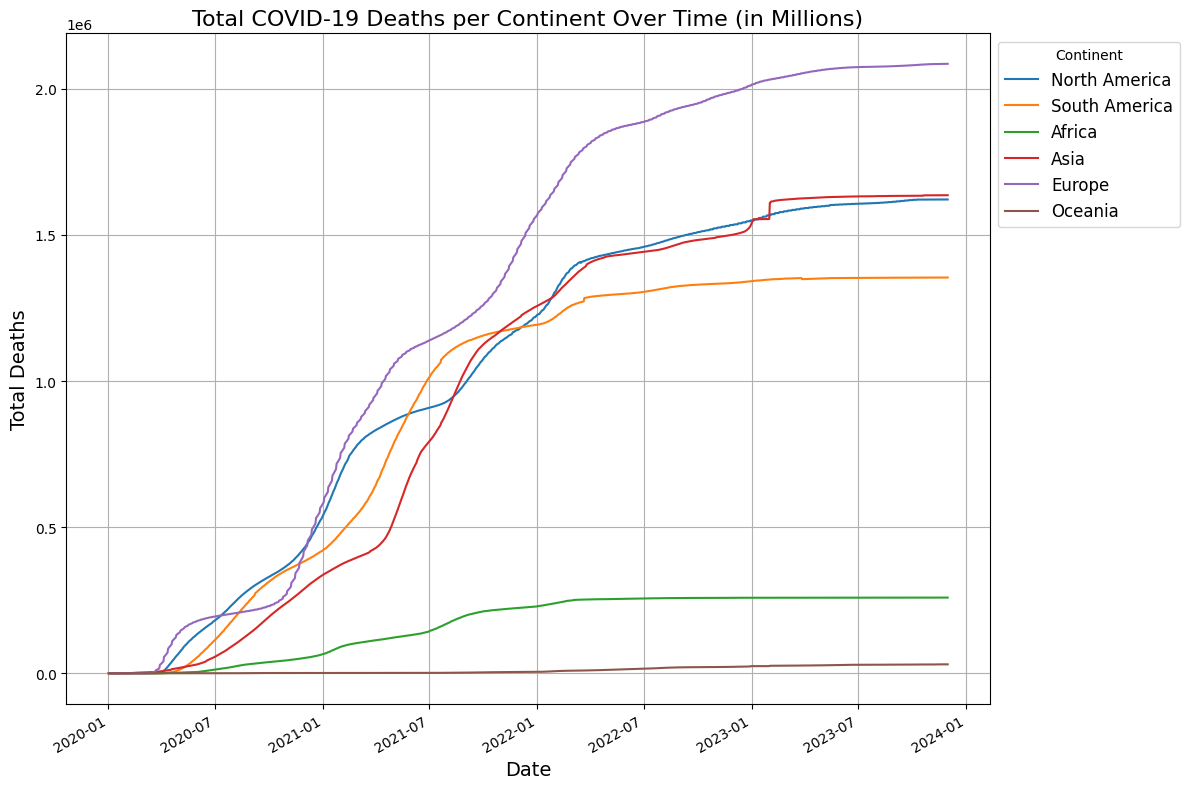

In [13]:
# Ensure the data types for total_deaths are numeric
covid_data_df['total_deaths'] = pd.to_numeric(covid_data_df['total_deaths'], errors='coerce')

# Filter data up to December 2023
covid_data_df_filtered = covid_data_df[covid_data_df['date'] <= pd.to_datetime('2023-12-01')]

# Sum total deaths for each continent on each date
total_deaths_per_continent_date = covid_data_df_filtered.groupby(['date', 'continent'])['total_deaths'].sum().reset_index()

# Create a line plot for total deaths over time by continent
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='total_deaths', hue='continent', data=total_deaths_per_continent_date, palette='tab10')

# Adding labels, title, and grid
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.title('Total COVID-19 Deaths per Continent Over Time (in Millions)', fontsize=16)
plt.grid(True)  # Add gridlines

# Optimize the legend
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Improve readability of the date ticks
plt.gcf().autofmt_xdate()  # Auto-format the dates to improve readability

# Show the plot
plt.tight_layout()  # Adjust layout for a neat presentation
plt.show()

## Comparison of Total Deaths to Total Cases by Continent

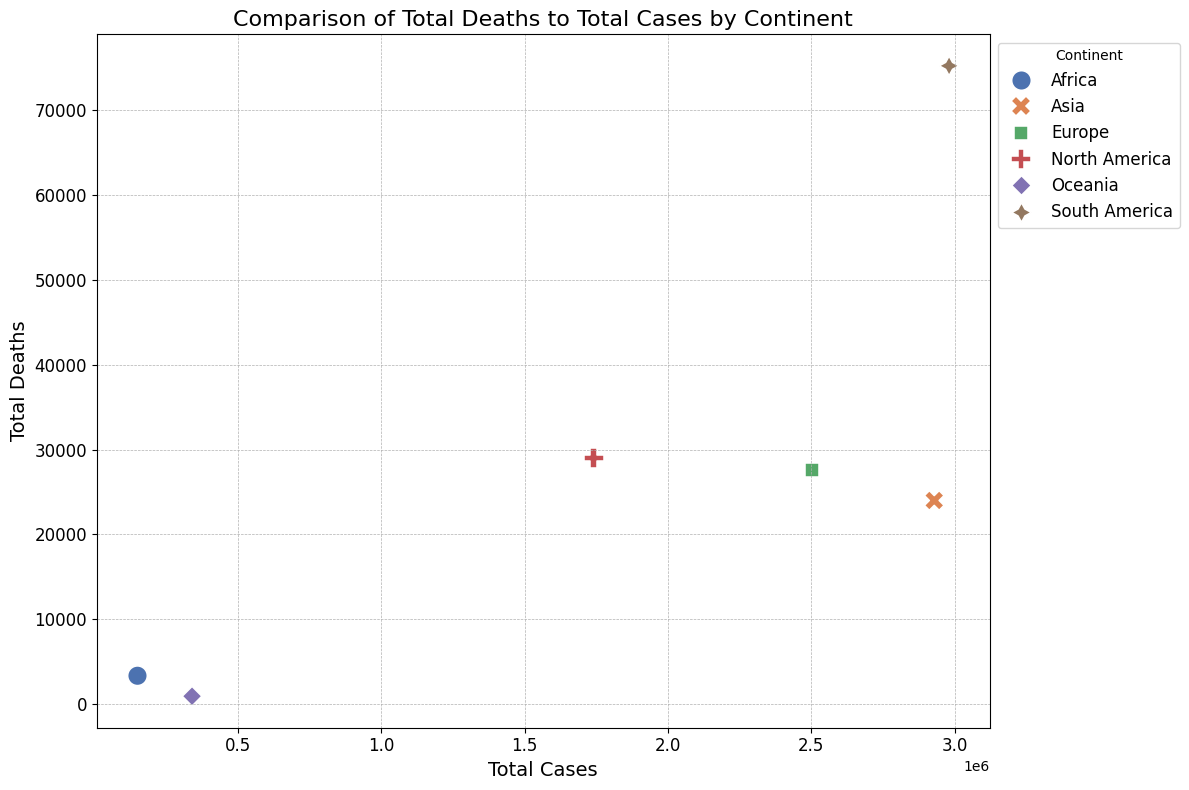

In [14]:
# Ensure numeric types for total_cases and total_deaths
covid_data_df['total_cases'] = pd.to_numeric(covid_data_df['total_cases'], errors='coerce')
covid_data_df['total_deaths'] = pd.to_numeric(covid_data_df['total_deaths'], errors='coerce')

# Calculate the mean or median total cases and total deaths for each continent
# Replace .mean() with .median() if that's more appropriate for your dataset
aggregate_data = covid_data_df.groupby('continent')[['total_cases', 'total_deaths']].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=aggregate_data, x='total_cases', y='total_deaths', hue='continent', style='continent', s=200, palette='deep')

# Axis labels and title
plt.xlabel('Total Cases', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.title('Comparison of Total Deaths to Total Cases by Continent', fontsize=16)

# Adding gridlines for better readability
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust legend
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Improve tick marks readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Total Deaths Austria vs Germany

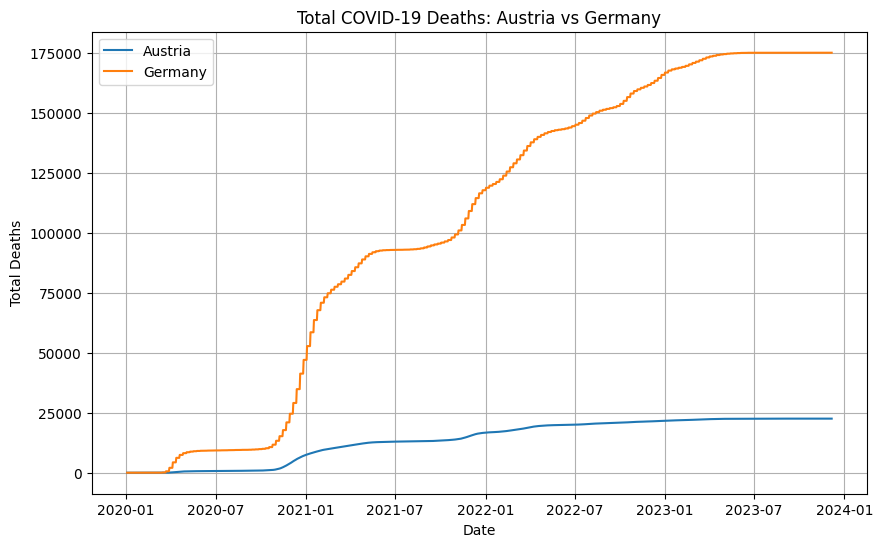

In [15]:
# Filter for Austria and Germany
filtered_df = covid_data_df[covid_data_df['location'].isin(['Austria', 'Germany'])]

# Group by location and date, then sum the total deaths
grouped_df = filtered_df.groupby(['location', 'date'])['total_deaths'].sum().reset_index()

# Pivot the data for plotting
pivot_df = grouped_df.pivot(index='date', columns='location', values='total_deaths')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pivot_df['Austria'], label='Austria')
plt.plot(pivot_df['Germany'], label='Germany')
plt.title('Total COVID-19 Deaths: Austria vs Germany')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

## New Deaths Austria vs Germany
Comparison between Austria and Germany in perspective of Covid 19 Deaths

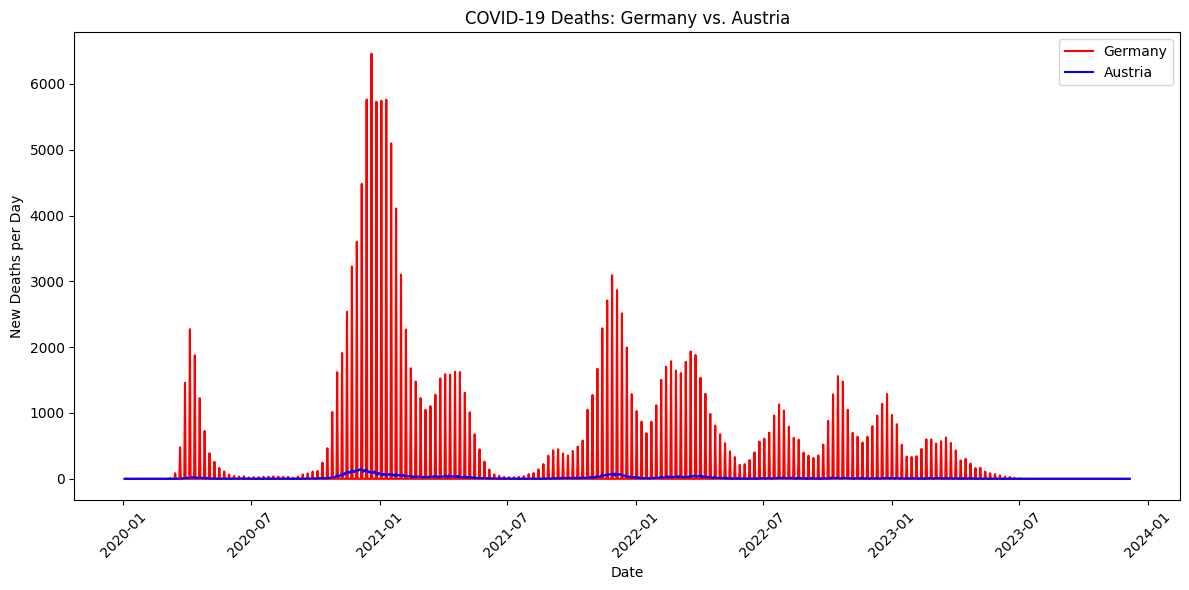

In [16]:
# Filter for Country1 and Country2
country1 = 'Germany'
country2 = 'Austria'


# Filter data for the first country
country1_data = covid_data_df[covid_data_df['location'] == country1].copy()

# Filter data for the second country
country2_data = covid_data_df[covid_data_df['location'] == country2].copy()

# Convert into datetime objects
country1_data['date'] = pd.to_datetime(country1_data['date'])
country2_data['date'] = pd.to_datetime(country2_data['date'])

country1_deaths = country1_data.groupby('date')['new_deaths'].sum()
country2_deaths = country2_data.groupby('date')['new_deaths'].sum()

# DataFrame for comparison
comparison_data = pd.DataFrame({
    country1: country1_deaths,
    country2: country2_deaths
})

comparison_data.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data[country1], label=country1, color='red')
plt.plot(comparison_data.index, comparison_data[country2], label=country2, color='blue')
plt.title(f'COVID-19 Deaths: {country1} vs. {country2}')
plt.xlabel('Date')
plt.ylabel('New Deaths per Day')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Correlation between PCE and Covid in the United States of America
PCE (Personal Consumption Expenditures) measures U.S. resident spending on goods and services. It is a significant economic indicator, reflecting consumer confidence and economic activity. \
The dataset for the PCE is fetched from: https://fred.stlouisfed.org/series/PCE (last accessed: 22.12.2023)

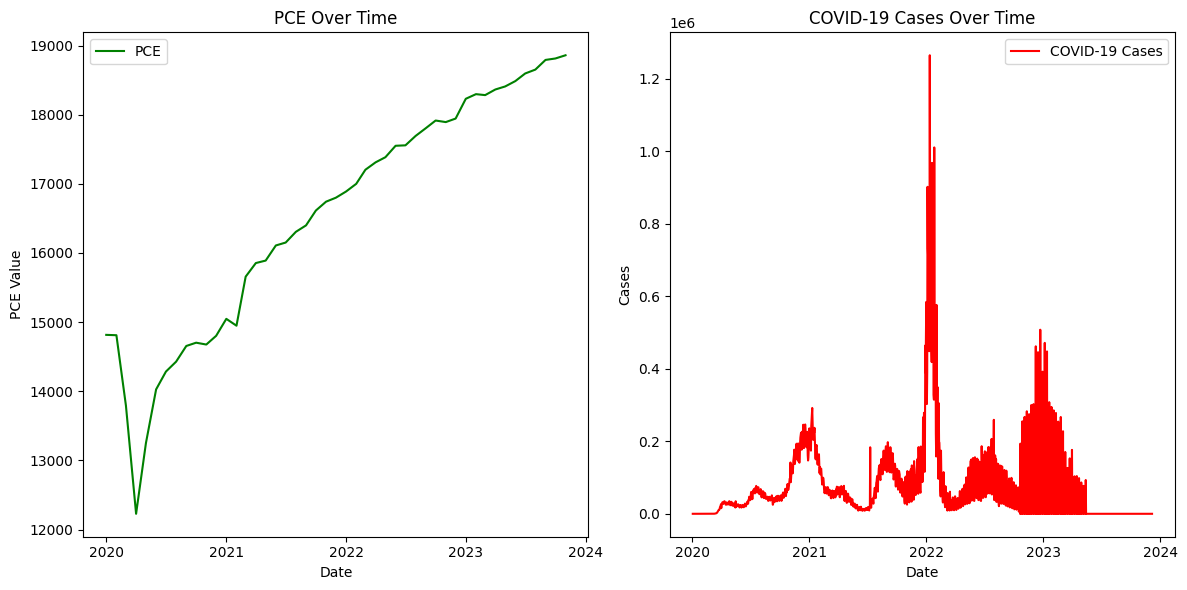

In [17]:
# Define the start date
startPeriod = '2020-01-01'

# Load PCE data
PCE_data_df = pd.read_csv('Data/PCE.csv')
PCE_data_df['DATE'] = pd.to_datetime(PCE_data_df['DATE'])
PCE_data_df = PCE_data_df[PCE_data_df['DATE'] >= pd.to_datetime(startPeriod)]

# Load COVID data (replace with your COVID-19 data file path)
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])

# Prepare COVID data for the United States only
usa_covid_data = covid_data_df[covid_data_df['location'] == 'United States']
usa_covid_data = usa_covid_data.groupby('date')['new_cases'].sum()  # Sum new cases for each date

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 2 rows, 1 column

# Plot PCE data
axs[0].plot(PCE_data_df['DATE'], PCE_data_df['PCE'], label='PCE', color='green')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].set_title('PCE Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('PCE Value')
axs[0].legend()

# Plot COVID-19 data
axs[1].plot(usa_covid_data.index, usa_covid_data, label='COVID-19 Cases', color='red')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].set_title('COVID-19 Cases Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cases')
axs[1].legend()

plt.tight_layout()
plt.show()


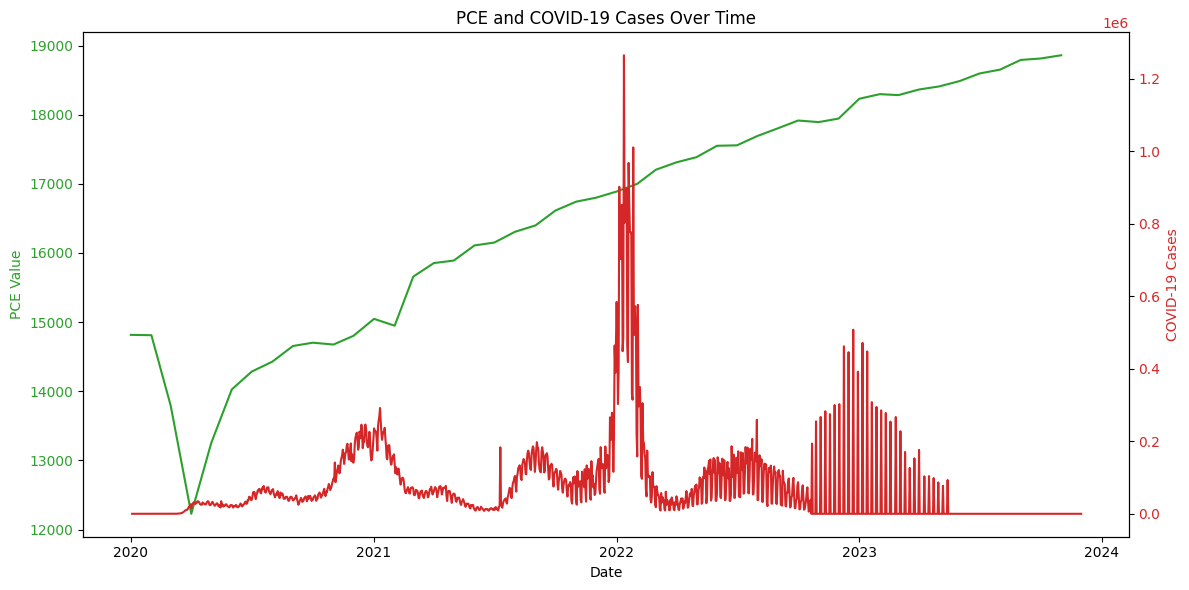

In [18]:
# Start and end dates
startPeriod = '2020-01-01'
endPeriod = '2023-12-01'

# Load PCE data
PCE_data_df = pd.read_csv('Data/PCE.csv')
PCE_data_df['DATE'] = pd.to_datetime(PCE_data_df['DATE'])
PCE_data_df = PCE_data_df[(PCE_data_df['DATE'] >= pd.to_datetime(startPeriod)) & (PCE_data_df['DATE'] <= pd.to_datetime(endPeriod))]

# Prepare COVID data for the United States only
usa_covid_data = covid_data_df[covid_data_df['location'] == 'United States']
usa_covid_data = usa_covid_data.groupby('date')['new_cases'].sum()  # Sum new cases for each date
usa_covid_data = usa_covid_data[(usa_covid_data.index >= pd.to_datetime(startPeriod)) & (usa_covid_data.index <= pd.to_datetime(endPeriod))]

# Normalize the data
scaler = MinMaxScaler()
PCE_data_df['PCE_normalized'] = scaler.fit_transform(PCE_data_df[['PCE']])
usa_covid_data_values = scaler.fit_transform(usa_covid_data.values.reshape(-1,1))

# Convert normalized numpy array back to pandas Series
usa_covid_data_normalized = pd.Series(usa_covid_data_values.flatten(), index=usa_covid_data.index)

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PCE data
color = 'tab:green'
ax1.set_ylabel('PCE Value', color=color)
ax1.plot(PCE_data_df['DATE'], PCE_data_df['PCE'], label='PCE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot COVID-19 data
color = 'tab:red'
ax2.set_ylabel('COVID-19 Cases', color=color)
ax2.plot(usa_covid_data.index, usa_covid_data, label='COVID-19 Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_title('PCE and COVID-19 Cases Over Time')
ax1.set_xlabel('Date')

fig.tight_layout()
plt.show()

## Correlation between the Number of Flights and Covid in the UK
The dataset is available: https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/dailyukflights (last accessed: 29.12.2023)

Index(['Date', 'Number of flights', 'Seven-day average', 'Notes'], dtype='object')


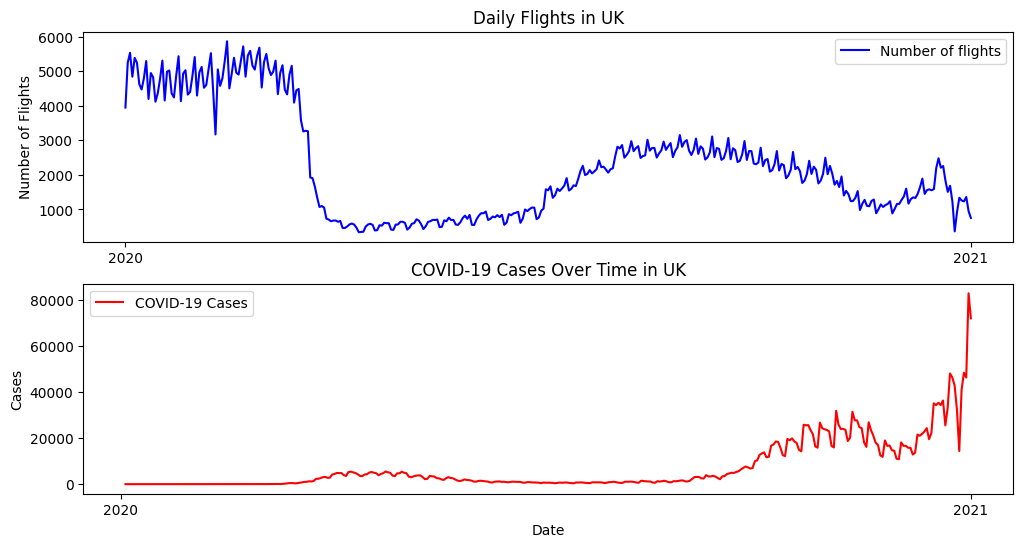

<Figure size 1200x600 with 0 Axes>

In [19]:
# Define start and end period
startPeriod = '2020-01-01'
endPeriod = '2021-01-01'

# Reading the CSV file for flight data in UK
uk_flights_df = pd.read_csv('Data/dailyukflightsdataset.csv')
print(uk_flights_df.columns)

# Convert 'Date' from string to datetime 
uk_flights_df['Date'] = pd.to_datetime(uk_flights_df['Date'])

# Set the range for the dates
uk_flights_df = uk_flights_df[uk_flights_df['Date'] >= pd.to_datetime(startPeriod)]
uk_flights_df = uk_flights_df[uk_flights_df['Date'] <= pd.to_datetime(endPeriod)]

# Load COVID data for United Kingdom
uk_covid_data = covid_data_df[covid_data_df['location'] == 'United Kingdom']
uk_covid_data = uk_covid_data.groupby('date')['new_cases'].sum() 
uk_covid_data = uk_covid_data[uk_covid_data.index <= pd.to_datetime(endPeriod)] # Filter for dates up to endPeriod


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 6))  # 2 rows, 1 column

# Plotting the data
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, bottom=1.1, right=0.9, top=1.9, wspace=0.4,hspace=0.4)

# Plot flight data
axs[0].plot(uk_flights_df['Date'], uk_flights_df['Number of flights'], label='Number of flights', color='blue')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].set_title('Daily Flights in UK')
axs[0].set_ylabel('Number of Flights')
axs[0].legend()

# Plot COVID-19 data
axs[1].plot(uk_covid_data.index, uk_covid_data, label='COVID-19 Cases', color='red')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].set_title('COVID-19 Cases Over Time in UK')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cases')
axs[1].legend()

plt.tight_layout()
plt.show()



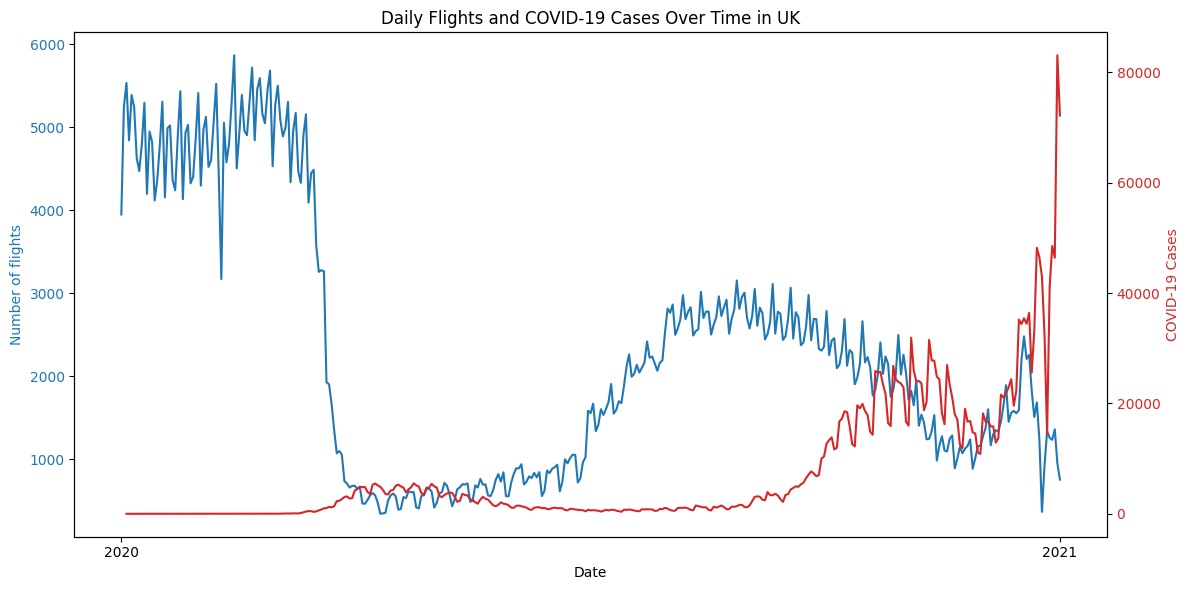

In [22]:
# Define start and end period
startPeriod = '2020-01-01'
endPeriod = '2021-01-01'

# Reading the CSV file for flight data in UK
uk_flights_df = pd.read_csv('Data/dailyukflightsdataset.csv')

# Convert 'Date' from string to datetime 
uk_flights_df['Date'] = pd.to_datetime(uk_flights_df['Date'])

# Set the range for the dates
uk_flights_df = uk_flights_df[uk_flights_df['Date'] >= pd.to_datetime(startPeriod)]
uk_flights_df = uk_flights_df[uk_flights_df['Date'] <= pd.to_datetime(endPeriod)]

# Load COVID data for United Kingdom
uk_covid_data = covid_data_df[covid_data_df['location'] == 'United Kingdom']
uk_covid_data = uk_covid_data.groupby('date')['new_cases'].sum() 
uk_covid_data = uk_covid_data[uk_covid_data.index <= pd.to_datetime(endPeriod)] # Filter for dates up to endPeriod


# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot flight data
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of flights', color=color)
ax1.plot(uk_flights_df['Date'], uk_flights_df['Number of flights'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot COVID-19 data
color = 'tab:red'
ax2.set_ylabel('COVID-19 Cases', color=color)
ax2.plot(uk_covid_data.index, uk_covid_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_title('Daily Flights and COVID-19 Cases Over Time in UK')

fig.tight_layout()
plt.show()

# Comperative Analysis of the COVID-19 data

In [24]:

# Filtering the dataset for European countries
europe_data = covid_data_df[covid_data_df['continent'] == 'Europe']

# Selecting relevant metrics for comparison
europe_metrics = europe_data.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    population=('population', 'mean')
).reset_index()

# Calculating additional metrics
europe_metrics['case_fatality_rate'] = europe_metrics['total_deaths'] / europe_metrics['total_cases']
europe_metrics['cases_per_100k'] = (europe_metrics['total_cases'] / europe_metrics['population']) * 100000
europe_metrics['deaths_per_100k'] = (europe_metrics['total_deaths'] / europe_metrics['population']) * 100000

# Since the latest vaccination data might be more relevant, filter for the most recent data for each country
latest_dates = europe_data.groupby('location')['date'].max()
latest_vaccination_data = europe_data[europe_data.set_index(['location', 'date']).index.isin(latest_dates.items())]

# Merging the latest vaccination data
europe_metrics = europe_metrics.merge(
    latest_vaccination_data[['location', 'people_vaccinated_per_hundred']], on='location', how='left'
)

# Display the complete dataframe
# You can use .to_string() if the dataframe is not fully displayed in your environment
print(europe_metrics.sort_values(by='total_cases', ascending=False).to_string())


                  location  total_cases  total_deaths   population  case_fatality_rate  cases_per_100k  deaths_per_100k  people_vaccinated_per_hundred
15                  France   38997490.0      167985.0   67813000.0            0.004308    57507.395337       247.717989                            NaN
16                 Germany   38437756.0      174979.0   83369840.0            0.004552    46105.109474       209.882855                            NaN
24                   Italy   26318717.0      192909.0   59037472.0            0.007330    44579.681528       326.756877                            NaN
52          United Kingdom   24812582.0      232112.0   67508936.0            0.009355    36754.514987       343.824112                            NaN
42                  Russia   23258444.0      400488.0  144713312.0            0.017219    16072.083265       276.745791                            NaN
48                   Spain   13980340.0      121852.0   47558632.0            0.008716    2939

## Visualisation of the Comperative Analysis

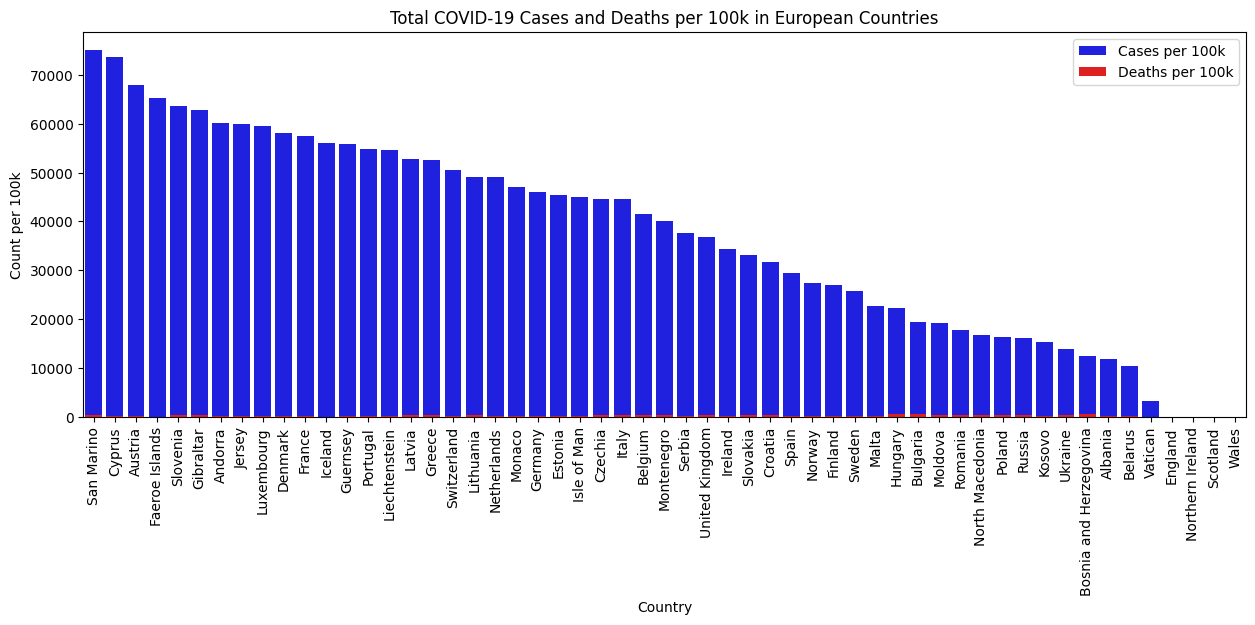

In [32]:
# Selecting relevant metrics for comparison
europe_metrics = europe_data.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    population=('population', 'mean')
).reset_index()

# Calculating additional metrics
europe_metrics['case_fatality_rate'] = europe_metrics['total_deaths'] / europe_metrics['total_cases']
europe_metrics['cases_per_100k'] = (europe_metrics['total_cases'] / europe_metrics['population']) * 100000
europe_metrics['deaths_per_100k'] = (europe_metrics['total_deaths'] / europe_metrics['population']) * 100000

# Since the latest vaccination data might be more relevant, filter for the most recent data for each country
latest_dates = europe_data.groupby('location')['date'].max()
latest_vaccination_data = europe_data[europe_data.set_index(['location', 'date']).index.isin(latest_dates.items())]

# Merging the latest vaccination data
europe_metrics = europe_metrics.merge(
    latest_vaccination_data[['location', 'people_vaccinated_per_hundred']], on='location', how='left'
)

# Plotting

# Bar Chart of Total Cases and Deaths per 100k
plt.figure(figsize=(15, 5))
europe_metrics_sorted = europe_metrics.sort_values(by='cases_per_100k', ascending=False)
sns.barplot(x='location', y='cases_per_100k', data=europe_metrics_sorted, color='blue', label='Cases per 100k')
sns.barplot(x='location', y='deaths_per_100k', data=europe_metrics_sorted, color='red', label='Deaths per 100k')
plt.xticks(rotation=90)
plt.legend()
plt.title('Total COVID-19 Cases and Deaths per 100k in European Countries')
plt.xlabel('Country')
plt.ylabel('Count per 100k')

# Scatter Plot of Case Fatality Rate vs. Cases per 100k with annotations
import plotly.express as px

# Assuming europe_metrics is already defined

# Interactive Scatter Plot using Plotly
fig = px.scatter(europe_metrics, x='cases_per_100k', y='case_fatality_rate', text='location',
                 title='Case Fatality Rate vs. Cases per 100k in European Countries')
fig.update_traces(textposition='top center')
fig.show()


# Pre-processing: Feature selection/extraction

# Classification

# Clusterring